In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns

In [14]:
import plotly.express as px

In [15]:
connection=mysql.connector.connect(
    user='root',
    password='Kavi@1602',
    host='localhost',
    database='EmploymentsDatabase'
)

In [16]:
cursor=connection.cursor()

In [17]:
cursor.execute('select * from  Payroll')
Payroll=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [18]:
cursor.execute('select * from  Attendance')
Attendance=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [19]:
Payroll.head()

,employee_id,employee_name,department,position,salary,tax_rate,deductions,bonuses,overtime_hours,overtime_pay,total_pay
0,1,John Doe,Marketing,Marketing Manager,5000.00,20.00,200.00,500.00,10.00,50.00,5300.00
1,2,Jane Smith,Finance,Accountant,4500.00,18.00,180.00,400.00,8.00,40.00,4760.00
2,3,Michael Johnson,Human Resources,HR Specialist,4800.00,19.00,190.00,450.00,9.00,45.00,5055.00
3,4,Emily Wilson,Marketing,Marketing Coordinator,3800.00,16.00,160.00,300.00,6.00,30.00,3970.00
4,5,David Martinez,Finance,Financial Analyst,4700.00,20.00,190.00,420.00,9.00,45.00,4955.00


In [20]:
Payroll.columns

Index(['employee_id', 'employee_name', 'department', 'position', 'salary',
       'tax_rate', 'deductions', 'bonuses', 'overtime_hours', 'overtime_pay',
       'total_pay'],
      dtype='object')

In [21]:
Payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     30 non-null     int64 
 1   employee_name   30 non-null     object
 2   department      30 non-null     object
 3   position        30 non-null     object
 4   salary          30 non-null     object
 5   tax_rate        30 non-null     object
 6   deductions      30 non-null     object
 7   bonuses         30 non-null     object
 8   overtime_hours  30 non-null     object
 9   overtime_pay    30 non-null     object
 10  total_pay       30 non-null     object
dtypes: int64(1), object(10)
memory usage: 2.7+ KB


In [22]:
Payroll.describe()

,employee_id
count,30.000000
mean,15.500000
std,8.803408
min,1.000000
25%,8.250000
50%,15.500000
75%,22.750000
max,30.000000


In [23]:
Payroll.shape

(30, 11)

In [38]:
Attendance.loc[:,'status']

0     Present
1     Present
2     Present
3     Present
4     Present
5     Present
6     Present
7     Present
8     Present
9     Present
10    Present
11    Present
12    Present
13    Present
14    Present
15    Present
16    Present
17    Present
18    Present
19    Present
20    Present
21    Present
22    Present
23    Present
24    Present
25    Present
26    Present
27    Present
28    Present
29    Present
30    Present
31    Present
32    Present
33    Present
34    Present
35    Present
36    Present
37    Present
38    Present
39    Present
Name: status, dtype: object

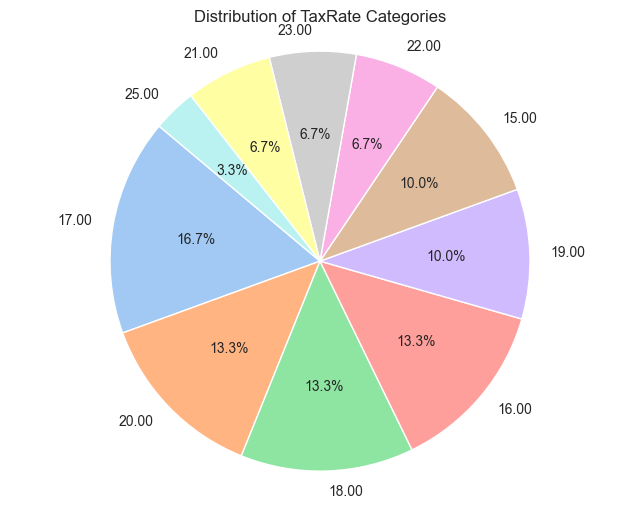

In [37]:
tax_rate_counts = Payroll['tax_rate'].value_counts()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie( tax_rate_counts, labels= tax_rate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TaxRate Categories')
plt.axis('equal')
plt.show()

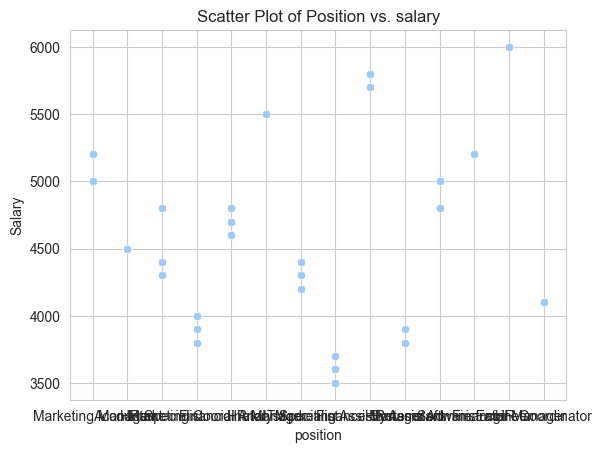

In [26]:
sns.scatterplot(data=Payroll, x='position', y='salary')
plt.title('Scatter Plot of Position vs. salary')
plt.xlabel('position')
plt.ylabel('Salary')
plt.show()

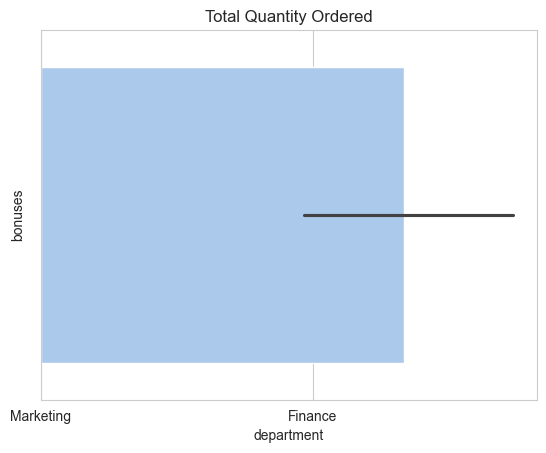

In [41]:
sns.barplot(data=Payroll, x='department')
plt.title('Total Quantity Ordered')
plt.xlabel('department')
plt.ylabel('bonuses')
plt.show()

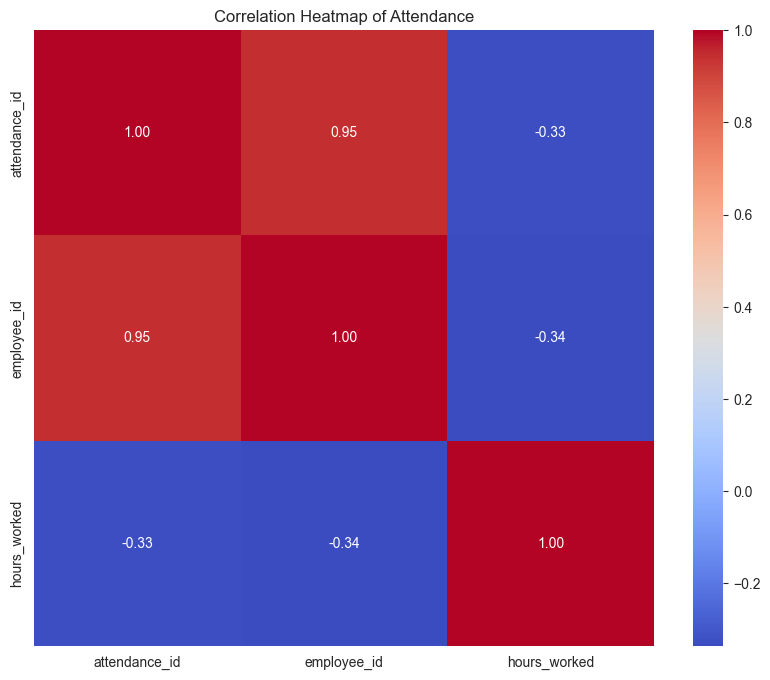

In [33]:
numeric_columns = ['attendance_id', 'employee_id', 'hours_worked']
correlation_matrix = Attendance[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Attendance')
plt.show()